In [ ]:
import seaborn as sns


In [ ]:
# importing Required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# iomporting data set into our program
file_path = r'C:\Users\pc\Downloads\Task 1 YouTube Streamer Analysis-20240223T055339Z-001.zip'
df = pd.read_csv(file_path,encoding='unicode_escape')
df.shape

In [ ]:
df.head(15)

In [ ]:
df.info()

In [ ]:
pd.isnull(df)

In [ ]:
pd.isnull(df).sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.columns

In [ ]:
df.describe()


In [ ]:
df[['Rank','Suscribers','Visits']].describe()

In [ ]:
 #to Visualize the The details of the particular Channel
channel_name = input("Enter the channel name you want to visualize (case-sensitive): ")

In [ ]:
if channel_name not in df['Username'].values:
    print(f"Channel '{channel_name}' not found in the dataset.")
else:
    # Select data for the specified channel
    channel_data = df[df['Username'] == channel_name]
    
    plt.figure(figsize=(8, 4))
      # Subscribers, Visits, Likes, Comments, and Links
    plt.subplot(1, 4, 1)
    plt.bar(['Suscribers'], channel_data['Suscribers'], color='skyblue')
    plt.title('Suscribers')

    plt.subplot(1, 4, 2)
    plt.bar(['Visits'], channel_data['Visits'], color='lightsalmon')
    plt.title('Visits')

    plt.subplot(1, 4, 3)
    plt.bar(['Likes'], channel_data['Likes'], color='darkseagreen')
    plt.title('Likes')

    plt.subplot(1, 4, 4)
    plt.bar(['Comments'], channel_data['Comments'], color='goldenrod')
    plt.title('Comments')

    # Print descriptive information
    print(f"\nDescriptive Information for Channel: {channel_name}")
    print(f"Country: {channel_data['Country'].values[0]}")
    print(f"Categories: {channel_data['Categories'].values[0]}")
    print(f"Links: {channel_data['Links'].values[0]}\n")
    
    plt.suptitle(f'Detailed Metrics for Channel: {channel_name}')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [ ]:
# Representing The Top 10 Highest Liked Channels with links
top_10_videos = df.nlargest(10, 'Likes')
print("Top 10 Videos with the Highest Likes:")
for index, row in top_10_videos.iterrows():
    video_title = row['Username']
    video_likes = row['Likes']
    video_link = row['Links']
    print(f"\nTitle: {video_title}\nLikes: {video_likes}\nLink: {video_link}")

In [ ]:
# Visualizibg Top10 most subscribed channels with there country names
plt.figure(figsize=(15, 6))
top_10_channels = df.sort_values(by='Suscribers', ascending=False).head(10)
bars = plt.bar(top_10_channels['Username'], top_10_channels['Suscribers'], color='thistle')
plt.xlabel('Channel Names')
plt.ylabel('Subscribers Count')
plt.title('Top 10 Most Subscribed Channels')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Displaying channel names and corresponding country names on top of the bars
for bar, username, country in zip(bars, top_10_channels['Username'], top_10_channels['Country']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01 * max(top_10_channels['Suscribers']),
             f"{username}\n({country})", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# visualizing countries with num of youtube channel
sns.set(rc={'figure.figsize':(30,6)})
ax=sns.countplot(x='Country',data=df)

In [ ]:
df['Categories'].value_counts

In [ ]:
num_unique_Usernames = df['Username'].nunique()
print(f"Number of Unique Usernames: {num_unique_Usernames}")

In [ ]:
# Taking the unique categories 
num_unique_categories = df['Categories'].nunique()
print(f"Number of Unique Categories: {num_unique_categories}")

In [ ]:
unique_categories = df['Categories'].unique()
print(unique_categories)

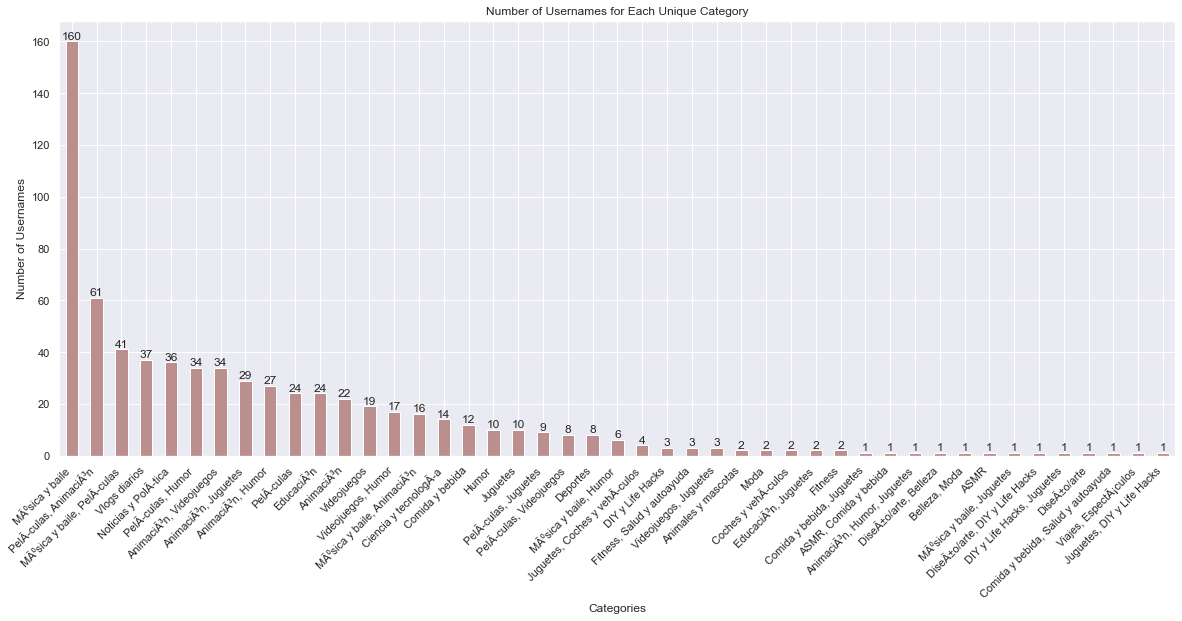

In [26]:
category_counts = df['Categories'].value_counts()

# Increase the size of the graph
plt.figure(figsize=(20, 8))

# Plotting
category_counts.plot(kind='bar', color='rosybrown')
plt.xlabel('Categories')
plt.ylabel('Number of Usernames')
plt.title('Number of Usernames for Each Unique Category')

# Displaying the count on top of each bar
for i, count in enumerate(category_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.show()